## Importing Neccessary Libraires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load CSV File

In [3]:
df = pd.read_csv("Processed_benguluru_data.csv")

In [4]:
df.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00


## Converting Location Column TO Numeric

In [5]:
dictt = {}
count = 0
for i in df["location"].unique():
    dictt[i] = count;
    count+=1;
dictt

{'Electronic City Phase II': 0,
 'Chikka Tirupathi': 1,
 'Uttarahalli': 2,
 'Lingadheeranahalli': 3,
 'Kothanur': 4,
 'Whitefield': 5,
 'Old Airport Road': 6,
 'Rajaji Nagar': 7,
 'Marathahalli': 8,
 '7th Phase JP Nagar': 9,
 'Gottigere': 10,
 'Sarjapur': 11,
 'Mysore Road': 12,
 'Bisuvanahalli': 13,
 'Raja Rajeshwari Nagar': 14,
 'other': 15,
 'Kengeri': 16,
 'Binny Pete': 17,
 'Thanisandra': 18,
 'Bellandur': 19,
 'Electronic City': 20,
 'Ramagondanahalli': 21,
 'Yelahanka': 22,
 'Hebbal': 23,
 'Kasturi Nagar': 24,
 'Kanakpura Road': 25,
 'Electronics City Phase 1': 26,
 'Kundalahalli': 27,
 'Chikkalasandra': 28,
 'Murugeshpalya': 29,
 'Sarjapur  Road': 30,
 'Doddathoguru': 31,
 'KR Puram': 32,
 'Bhoganhalli': 33,
 'Lakshminarayana Pura': 34,
 'Begur Road': 35,
 'Devanahalli': 36,
 'Varthur': 37,
 'Gunjur': 38,
 'Hegde Nagar': 39,
 'Haralur Road': 40,
 'Hennur Road': 41,
 'Kothannur': 42,
 'Kalena Agrahara': 43,
 'Kaval Byrasandra': 44,
 'Garudachar Palya': 45,
 'EPIP Zone': 46,
 'Da

In [8]:
df["location"] = df["location"].apply(lambda x: dictt[x])

In [9]:
df["location"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
df.head()

,location,bhk,total_sqft,bath,price
0,0,2.0,1056.0,2.0,39.07
1,1,4.0,2600.0,5.0,120.00
2,2,3.0,1440.0,2.0,62.00
3,3,3.0,1521.0,3.0,95.00
4,4,2.0,1200.0,2.0,51.00


## Model Building

In [18]:
def compute_cost(X, y, W, b):
    m = len(X)
    f_wb = np.dot(X, W) + b
    
    error = f_wb - y
    cost = np.sum(error**2)/(2*m)
    
    return cost

In [95]:
def gradeint_descent(X, y, W, b, alpha):
    m = len(X)
    iteration = 10000
    costT = []
    
    for i in range(iteration):
        f_wb = np.dot(X, W) + b
        
        cost = compute_cost(X, y, W, b)
        costT.append(cost)
        
        d_dw = (1/m)*np.sum(np.dot(f_wb - y, X))
        d_db = (1/m)*np.sum(f_wb - y)
        
        W = W - alpha * d_dw
        b = b - alpha * d_db
        
        if(i%100 == 0):
            print(f"Iteration = {i}, Cost = {cost}")
            
        if(costT[i] == costT[i-1] and i > 0):
            break
    
    return W, b, costT, i+1

In [96]:
X = df.drop(columns="price")
y = df["price"]
print(f"X = {X}")
print(f"y = {y}")

X =        location  bhk  total_sqft  bath
0             0  2.0      1056.0   2.0
1             1  4.0      2600.0   5.0
2             2  3.0      1440.0   2.0
3             3  3.0      1521.0   3.0
4             4  2.0      1200.0   2.0
...         ...  ...         ...   ...
12463       185  3.0      1715.0   3.0
12464        15  4.0      3600.0   5.0
12465        14  2.0      1141.0   2.0
12466        83  4.0      4689.0   4.0
12467        31  1.0       550.0   1.0

[12468 rows x 4 columns]
y = 0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
12463    112.00
12464    400.00
12465     60.00
12466    488.00
12467     17.00
Name: price, Length: 12468, dtype: float64


In [97]:
# Normalisation
X_norm  = X.copy()
for i in X.columns:
    X_norm[i] = (X[i] - np.mean(X[i])) / np.std(X[i])
y_norm = (y - np.mean(y)) / np.std(y)

print(f"X_norm = {X_norm}")
print(f"y_norm = {y_norm}")

X_norm =        location       bhk  total_sqft      bath
0     -0.998025 -0.742783   -0.413877 -0.538256
1     -0.982472  1.888613    1.000691  2.871512
2     -0.966918  0.572915   -0.062068 -0.538256
3     -0.951365  0.572915    0.012142  0.598334
4     -0.935812 -0.742783   -0.281949 -0.538256
...         ...       ...         ...       ...
12463  1.879333  0.572915    0.189879  0.598334
12464 -0.764726  1.888613    1.916862  2.871512
12465 -0.780279 -0.742783   -0.336003 -0.538256
12466  0.292898  1.888613    2.914572  1.734923
12467 -0.515873 -2.058480   -0.877460 -1.674845

[12468 rows x 4 columns]
y_norm = 0       -0.517243
1        0.142268
2       -0.330383
3       -0.061461
4       -0.420024
           ...   
12463    0.077075
12464    2.424030
12465   -0.346681
12466    3.141155
12467   -0.697095
Name: price, Length: 12468, dtype: float64


In [98]:
# Hyperparameters
W = np.zeros(X_norm.shape[1])
b = 0
alpha = 0.01

W_updated, b_updated, cost, iteration = gradeint_descent(X_norm, y_norm, W, b, alpha)

Iteration = 0, Cost = 0.5000000000000064
Iteration = 100, Cost = 0.3321999161578217
Iteration = 200, Cost = 0.3321998834624133


In [99]:
print(f"W_updated = {W_updated}");
print(f"b_updated = {b_updated}")

W_updated = [0.21246187 0.21246187 0.21246187 0.21246187]
b_updated = -2.0811641719486064e-16


## Data Visualisation

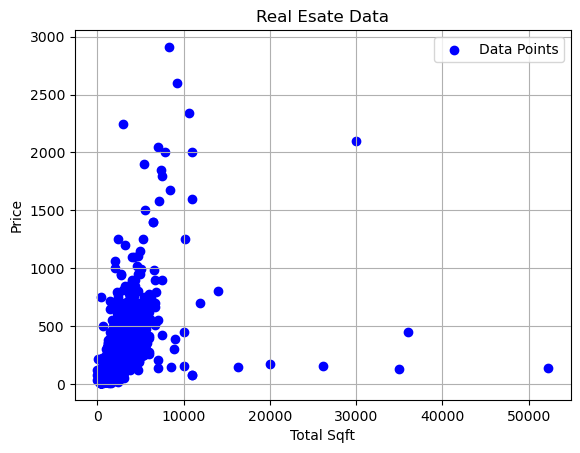

In [110]:
plt.scatter(X["total_sqft"], y, color="blue", label="Data Points")
plt.title("Real Esate Data")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

## Prediction

In [101]:
def predict(X, W, b):
    return np.dot(X, W) + b

In [102]:
f_wb = predict(X, W_updated, b_updated)

In [103]:
f_wb

array([ 225.20958384,  554.52548474,  307.43232813, ...,  246.24330912,
       1015.567746  ,  123.86527111])

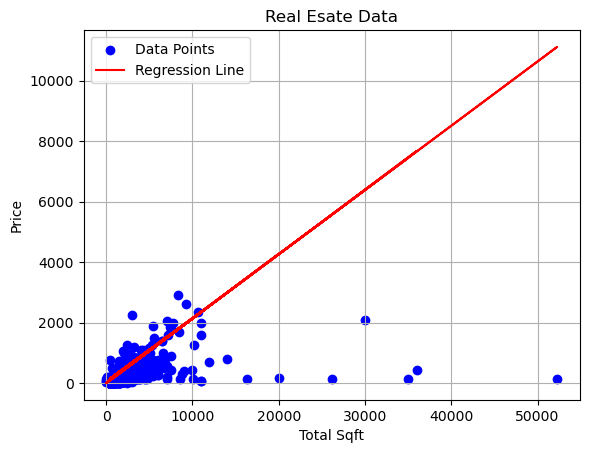

In [109]:
# Visualisation
plt.scatter(X["total_sqft"], y, color="blue", label="Data Points")
plt.plot(X["total_sqft"], f_wb, color="red", label="Regression Line")
plt.title("Real Esate Data")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

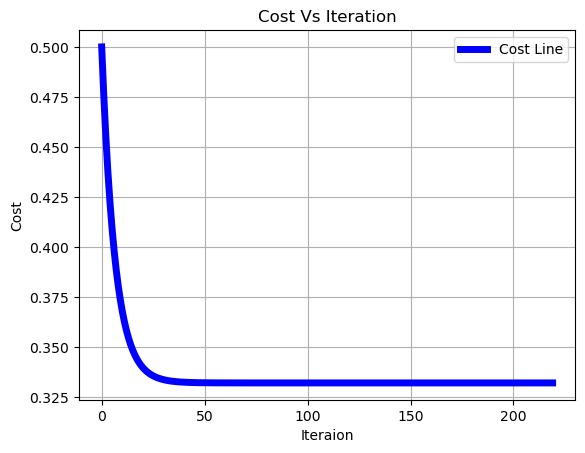

In [112]:
plt.plot(range(0, iteration), cost, label="Cost Line", color="blue", linewidth=5.0)
plt.title("Cost Vs Iteration")
plt.xlabel("Iteraion")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)